In [1]:
import pandas as pd#library used for data manipulation and analysis. 
import matplotlib.pyplot as plt#a comprehensive library used for creating static and interactive graphs and visualisations. 
import numpy as np # core library for array computing
import plotly.express as px
import seaborn as sns 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import sweetviz as sv
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
Toyota=pd.read_csv("ToyotaCorolla.csv",encoding="latin1")

In [9]:
Toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [10]:
Toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
Toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [12]:
Toyota[["Model","Price"]]

,Model,Price
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750
...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250


In [128]:
sns.pairplot(Toyota)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [129]:
report=sv.analyze(Toyota)
report.show_html("Toyota.html")

                                             |                                                          | [  0…

Report Toyota.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


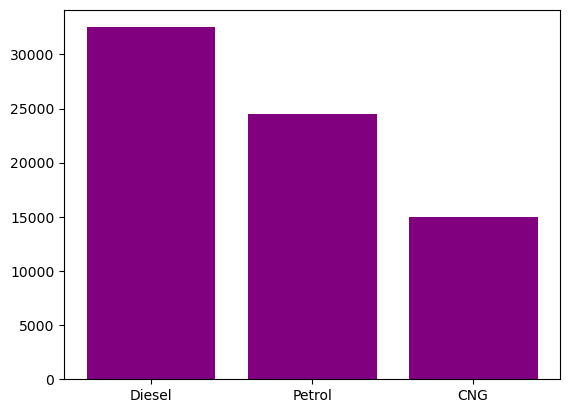

<Figure size 500x200 with 0 Axes>

In [13]:
plt.bar(data=Toyota,x="Fuel_Type",height="Price",color="purple")
plt.figure(figsize=(5,2))
plt.show()

In [14]:
hp=Toyota[["HP"]]

In [15]:
hp

,HP
0,90
1,90
2,90
3,90
4,90
...,...
1431,86
1432,86
1433,86
1434,86


In [16]:
price=Toyota.Price

In [17]:
price

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

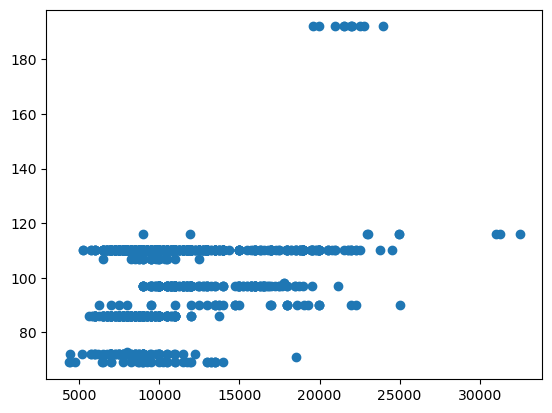

In [18]:
plt.scatter(Toyota.Price,Toyota.HP)

In [19]:
reg=linear_model.LinearRegression()
reg.fit(hp,price)

LinearRegression()

In [145]:
reg.predict([[5000]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([384290.21655214])

In [21]:
reg.coef_

array([76.25998803])

In [22]:
reg.intercept_

2990.2764101283365

In [27]:
pridict

,Cylinders,Gears,Met_Color
0,4,5,1
1,4,5,1
2,4,5,1
3,4,5,0
4,4,5,0
...,...,...,...
1431,4,5,1
1432,4,5,0
1433,4,5,0
1434,4,5,1


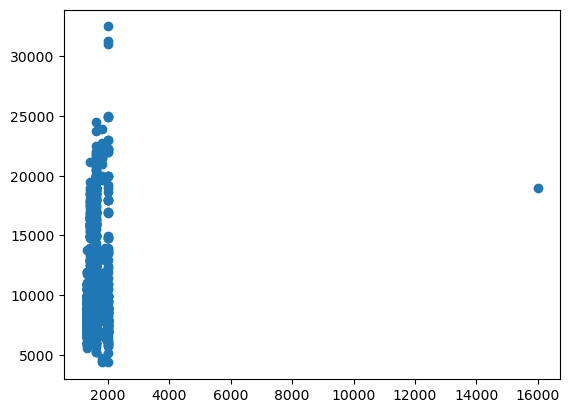

In [89]:
plt.scatter(Toyota.cc,price)

In [4]:
CC=Toyota[["cc"]]

NameError: name 'Toyota' is not defined

In [101]:
CC

,cc
0,2000
1,2000
2,2000
3,2000
4,2000
...,...
1431,1300
1432,1300
1433,1300
1434,1300


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CC,price, test_size=0.2, random_state=42)

NameError: name 'CC' is not defined

In [103]:
fit=linear_model.LinearRegression()
fit.fit(CC,price)

LinearRegression()

In [104]:
fit.predict([[2500]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11727.97557551])

In [105]:
fit.coef_

array([1.08016832])

In [106]:
fit.intercept_

9027.554783900552

In [133]:
New_cc={"cc":[2000,1500,2100,24000,3500,2200,2700,3900,4000,5000,1000,7000,5000]}

In [136]:
DF=pd.DataFrame(New_cc)

In [137]:
DF

,cc
0,2000
1,1500
2,2100
3,24000
4,3500
5,2200
6,2700
7,3900
8,4000
9,5000


In [138]:
pd=fit.predict(DF)

In [139]:
pd

array([11187.89141719, 10647.80725887, 11295.90824885, 34951.59438337,
       12808.14389216, 11403.92508052, 11944.00923884, 13240.21121881,
       13348.22805048, 14428.39636712, 10107.72310055, 16588.73300041,
       14428.39636712])

In [140]:
DF["Price"]=pd

In [141]:
DF

,cc,Price
0,2000,11187.891417
1,1500,10647.807259
2,2100,11295.908249
3,24000,34951.594383
4,3500,12808.143892
5,2200,11403.925081
6,2700,11944.009239
7,3900,13240.211219
8,4000,13348.228050
9,5000,14428.396367


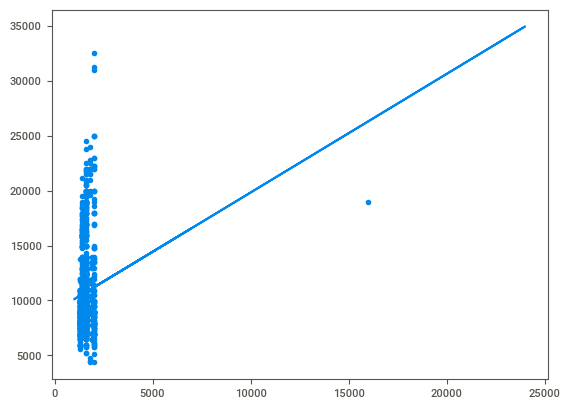

In [142]:
plt.scatter(Toyota.cc,price)
plt.plot(DF.cc,DF.Price)

In [143]:
pridict=Toyota[["Cylinders","Gears","Met_Color"]]

In [32]:
reg_=linear_model.LinearRegression()
reg_.fit(pridict,price)

LinearRegression()

In [36]:
reg.coef_

array([76.25998803])

In [37]:
reg.intercept_

2990.2764101283365

In [38]:
reg_.predict([[4,6,5]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15482.92251951])

In [146]:
from sklearn.model_selection import train_test_split

In [39]:
import statsmodels.formula.api as smf

In [144]:
Pre_price=smf.ols("Price~HP+cc+Gears+Cylinders+Met_Color",data=Toyota).fit()#ols(Ordinary Least Squares)
Pre_HP=smf.ols("HP~Power_Steering+Powered_Windows+Central_Lock",data=Toyota).fit()
Pre_CC=smf.ols("cc~Price+HP+Gears+Cylinders+Met_Color",data=Toyota).fit()

A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x) as : 
\hat{y}=b_1x+b_0  

In [86]:
print(Pre_price.params)
print(Pre_HP.params)
print(Pre_CC.params)

Intercept     96.826410
HP            74.264130
cc             0.962963
Gears        -85.163542
Cylinders    387.305639
Met_Color    676.399363
dtype: float64
Intercept          95.366926
Power_Steering      1.490484
Powered_Windows     6.007250
Central_Lock        2.244422
dtype: float64
Intercept     78.767357
Price          0.014738
HP            -0.184401
Gears         17.342726
Cylinders    315.069427
Met_Color     16.603275
dtype: float64


In [57]:
df=pd.read_excel(r'C:\Users\hp\OneDrive\Desktop\Book1.xlsx')

In [58]:
df

,POSITION,LEVEL,SALARY
0,C,1,45000
1,D,2,50000
2,A,3,60000
3,B,4,80000
4,E,5,110000
5,F,6,150000
6,G,7,200000
7,H,8,300000
8,I,9,500000
9,J,10,800000


In [61]:
y=df.iloc[:,2]

In [62]:
y

0       45000
1       50000
2       60000
3       80000
4      110000
5      150000
6      200000
7      300000
8      500000
9      800000
10    1000000
11    1300000
12    1600000
13    1900000
14    2300000
15    2700000
16    2900000
17    3003000
18    3500000
19    4000000
Name: SALARY, dtype: int64

In [59]:
x=df.iloc[:,1:2].values

In [60]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]], dtype=int64)

Text(0, 0.5, 'SALARY')

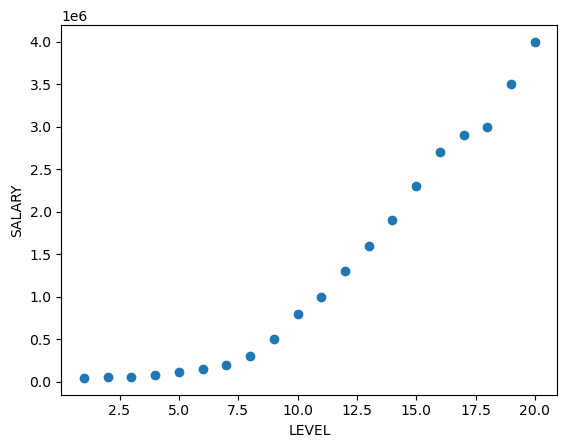

In [27]:
plt.scatter(x,y)
plt.xlabel('LEVEL')
plt.ylabel('SALARY')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

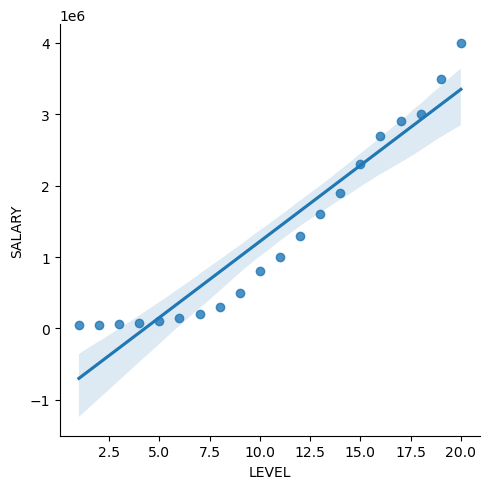

In [33]:
sns.lmplot(x='LEVEL',y='SALARY',data=df)
plt.show

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly=PolynomialFeatures(degree=2)

In [63]:
x_poly=poly.fit_transform(x)

In [43]:
reg=linear_model.LinearRegression()

In [64]:
reg.fit(x_poly,y)

LinearRegression()

In [75]:
pre=reg.predict(poly.fit_transform(x))

In [69]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.]])

In [70]:
y

0       45000
1       50000
2       60000
3       80000
4      110000
5      150000
6      200000
7      300000
8      500000
9      800000
10    1000000
11    1300000
12    1600000
13    1900000
14    2300000
15    2700000
16    2900000
17    3003000
18    3500000
19    4000000
Name: SALARY, dtype: int64

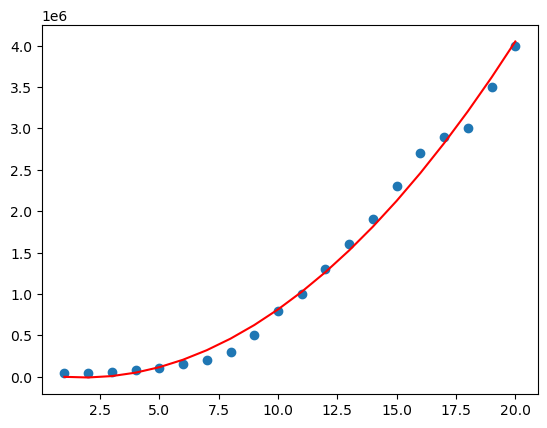

In [78]:
plt.scatter(x,y)
plt.plot(x,pre,color='red')